In [ ]:
#Question 2a

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import calendar

In [2]:
path = r"C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets"

In [3]:
df = []
years = range(1995, 2005)

In [4]:
for year in years: 
    filename = f"{year}.csv" 
    file_path = os.path.join(os.getcwd(), path, filename) 
     
    print(file_path) 
     
    if os.path.isfile(file_path): 
        df.append(pd.read_csv(file_path, encoding='latin-1', low_memory = True)) 
df = pd.concat(df, ignore_index=True)

C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1995.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1996.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1997.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1998.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1999.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2000.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2001.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2002.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2003.csv


C:\Users\ASUS UX534F\AppData\Local\Temp\ipykernel_6552\514506071.py:8: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file_path, encoding='latin-1', low_memory = True))


C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2004.csv


In [5]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1995,1,6,5,657.0,645,952.0,937,UA,482,...,7,25,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1995,1,7,6,648.0,645,938.0,937,UA,482,...,5,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1995,1,8,7,649.0,645,932.0,937,UA,482,...,3,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1995,1,9,1,645.0,645,928.0,937,UA,482,...,3,16,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1995,1,10,2,645.0,645,931.0,937,UA,482,...,6,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
57543857,2004,12,16,4,1645.0,1639,1715.0,1716,DL,1138,...,4,13,0,NaN,0,0.0,0.0,0.0,0.0,0.0
57543858,2004,12,16,4,726.0,720,1238.0,1239,DL,1139,...,10,11,0,NaN,0,0.0,0.0,0.0,0.0,0.0
57543859,2004,12,16,4,1336.0,1330,1507.0,1504,DL,1139,...,5,10,0,NaN,0,0.0,0.0,0.0,0.0,0.0
57543860,2004,12,16,4,538.0,540,720.0,723,DL,1140,...,7,12,0,NaN,0,0.0,0.0,0.0,0.0,0.0
57543861,2004,12,16,4,811.0,813,955.0,1008,DL,1140,...,7,12,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [8]:
def convert_time(float_time):
    return int(float_time // 100)

In [9]:
df['DepHour'] = df['CRSDepTime'].apply(convert_time)

In [10]:
df['AvgDelayTime'] = (df['ArrDelay'] + df['DepDelay'])/2

In [13]:
df_time = df[['Year', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime','ArrDelay','DepDelay','DepHour', 'AvgDelayTime']].copy()
df_time.dropna(axis=0, inplace=True)
df_time.describe()

,Year,DepTime,CRSDepTime,ArrTime,CRSArrTime,ArrDelay,DepDelay,DepHour,AvgDelayTime
count,5.608969e+07,5.608969e+07,5.608969e+07,5.608969e+07,5.608969e+07,5.608969e+07,5.608969e+07,5.608969e+07,5.608969e+07
mean,1.999724e+03,1.350366e+03,1.328534e+03,1.496820e+03,1.486118e+03,6.858825e+00,8.190849e+00,1.302526e+01,7.524837e+00
std,2.923488e+00,4.781325e+02,4.867334e+02,5.013525e+02,5.070464e+02,3.123084e+01,2.901927e+01,4.855530e+00,2.906940e+01
min,1.995000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.426000e+03,-1.410000e+03,0.000000e+00,-9.895000e+02
25%,1.997000e+03,9.340000e+02,9.250000e+02,1.118000e+03,1.113000e+03,-8.000000e+00,-2.000000e+00,9.000000e+00,-5.000000e+00
50%,2.000000e+03,1.335000e+03,1.325000e+03,1.525000e+03,1.520000e+03,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00
75%,2.002000e+03,1.739000e+03,1.729000e+03,1.920000e+03,1.915000e+03,1.100000e+01,6.000000e+00,1.700000e+01,8.000000e+00
max,2.004000e+03,2.750000e+03,2.400000e+03,2.955000e+03,2.400000e+03,2.137000e+03,2.119000e+03,2.400000e+01,2.128000e+03


C:\Users\ASUS UX534F\AppData\Local\Temp\ipykernel_6552\4251245910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_hour, x='DepHour', y='AvgDelayTime', palette='YlOrRd', ax=ax)


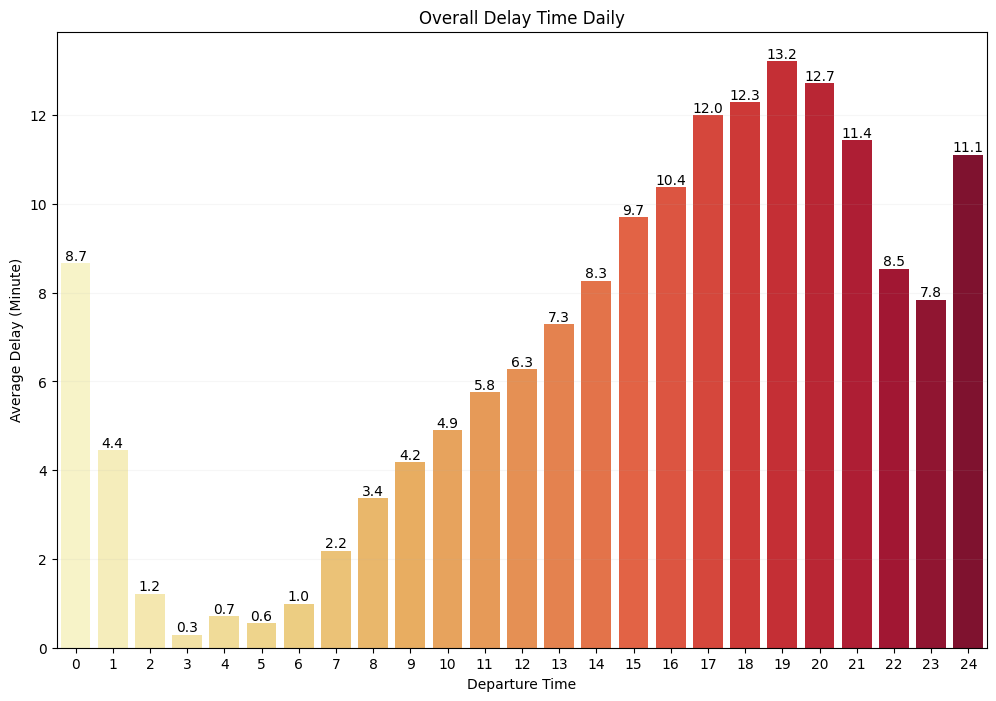

In [14]:
#Overall best time
df_avg_hour = df_time.groupby('DepHour', as_index=False).agg({'AvgDelayTime':'mean'})

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(data=df_avg_hour, x='DepHour', y='AvgDelayTime', palette='YlOrRd', ax=ax)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.title('Overall Delay Time Daily')
plt.xlabel('Departure Time')
plt.ylabel('Average Delay (Minute)')
plt.grid(True, axis='y', alpha=0.1)
plt.show()

C:\Users\ASUS UX534F\AppData\Local\Temp\ipykernel_6552\2212982314.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_hour, x='DepHour', y='AvgDelayTime', palette='YlOrRd', ax=axes[row_idx, col_idx])
C:\Users\ASUS UX534F\AppData\Local\Temp\ipykernel_6552\2212982314.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_hour, x='DepHour', y='AvgDelayTime', palette='YlOrRd', ax=axes[row_idx, col_idx])
C:\Users\ASUS UX534F\AppData\Local\Temp\ipykernel_6552\2212982314.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =

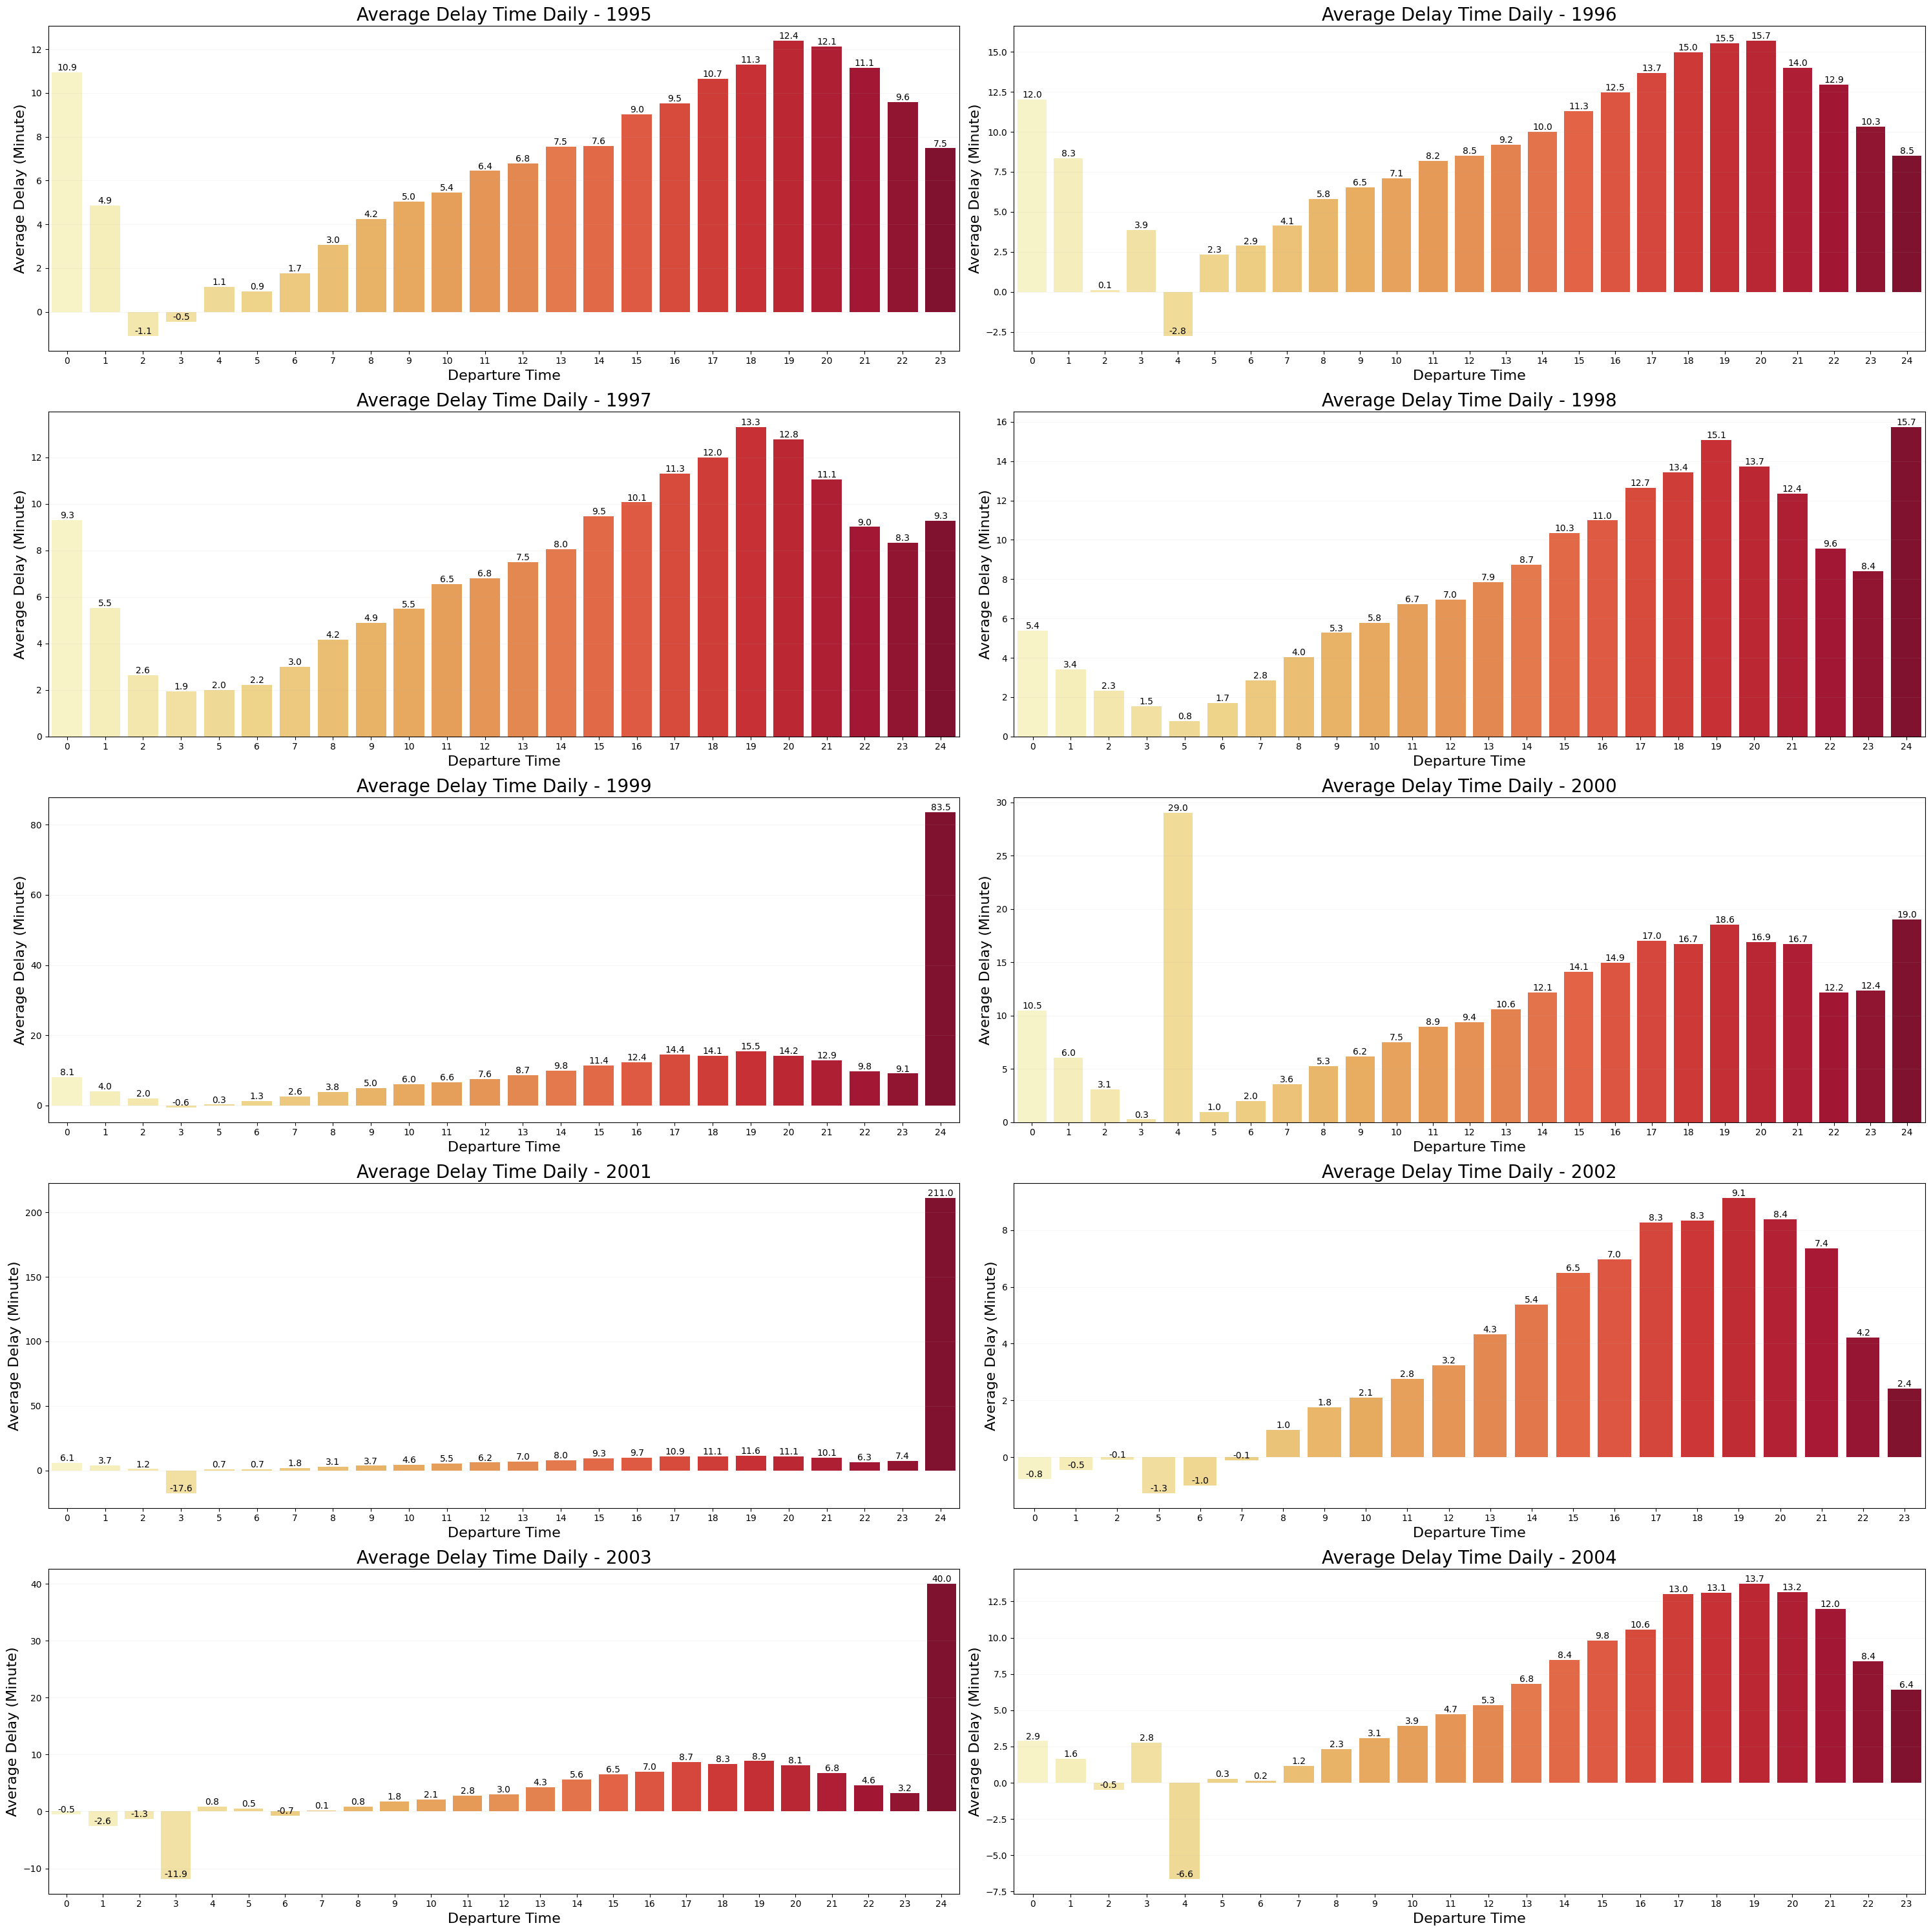

In [15]:
#Best day per year
num_rows = 5
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

for idx, year in enumerate(years):
    df_year = df[df['Year'] == year]
    df_avg_hour = df_year.groupby('DepHour', as_index=False)['AvgDelayTime'].mean()

    row_idx = idx // num_cols
    col_idx = idx % num_cols

    ax = sns.barplot(data=df_avg_hour, x='DepHour', y='AvgDelayTime', palette='YlOrRd', ax=axes[row_idx, col_idx])
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')
    ax.set_title(f'Average Delay Time Daily - {year}', fontsize=20)
    ax.set_xlabel('Departure Time', fontsize=16)
    ax.set_ylabel('Average Delay (Minute)', fontsize=16)
    ax.grid(True, axis='y', alpha=0.1)

plt.tight_layout()
plt.show()

In [11]:
df_day = df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
               'CRSArrTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'DepHour', 'AvgDelayTime']].copy()

df_avg_day = df_day.groupby('DayOfWeek', as_index=False)['AvgDelayTime'].mean()
df_avg_day['DayOfWeek'] = df_avg_day['DayOfWeek'].apply(lambda x: calendar.day_name[x-1])

C:\Users\ASUS UX534F\AppData\Local\Temp\ipykernel_18616\1967816749.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_avg_day, x='DayOfWeek', y='AvgDelayTime', palette='YlOrBr', ax=ax)


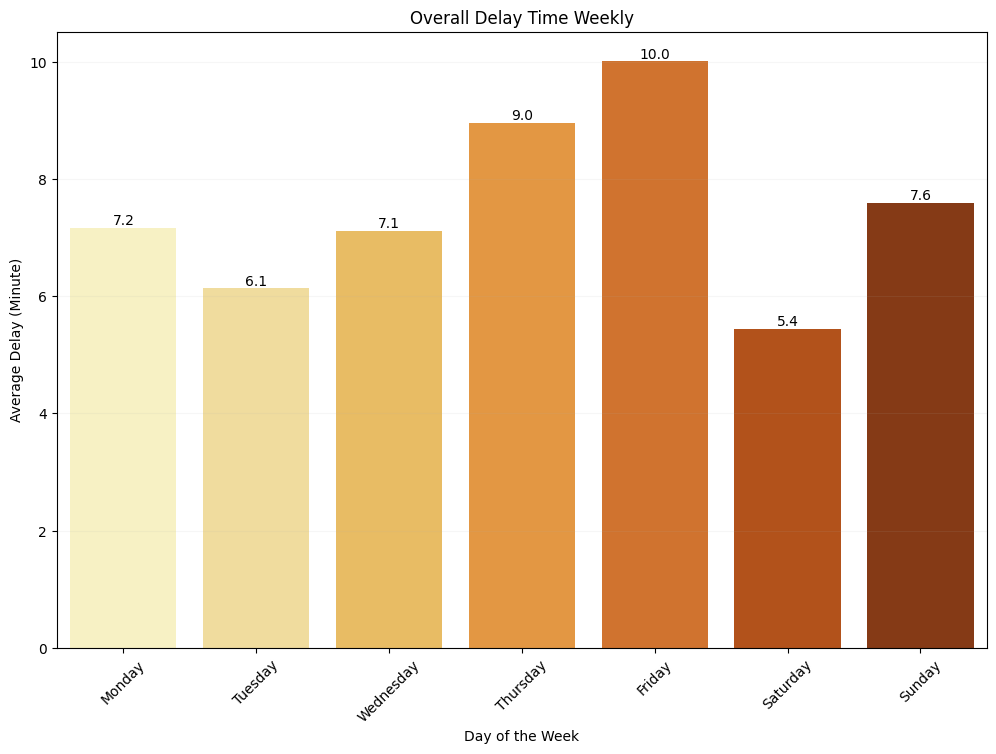

In [10]:
#Overall best day
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_avg_day, x='DayOfWeek', y='AvgDelayTime', palette='YlOrBr', ax=ax)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.title('Overall Delay Time Weekly')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (Minute)')
plt.grid(True, axis='y', alpha=0.1)
plt.xticks(rotation=45)
plt.show()

C:\Users\ASUS UX534F\AppData\Local\Temp\ipykernel_6552\1629313127.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_day, x='DayOfWeek', y='AvgDelayTime', palette='YlOrBr', ax=axes[row_idx, col_idx])
C:\Users\ASUS UX534F\AppData\Local\Temp\ipykernel_6552\1629313127.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_day, x='DayOfWeek', y='AvgDelayTime', palette='YlOrBr', ax=axes[row_idx, col_idx])
C:\Users\ASUS UX534F\AppData\Local\Temp\ipykernel_6552\1629313127.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax

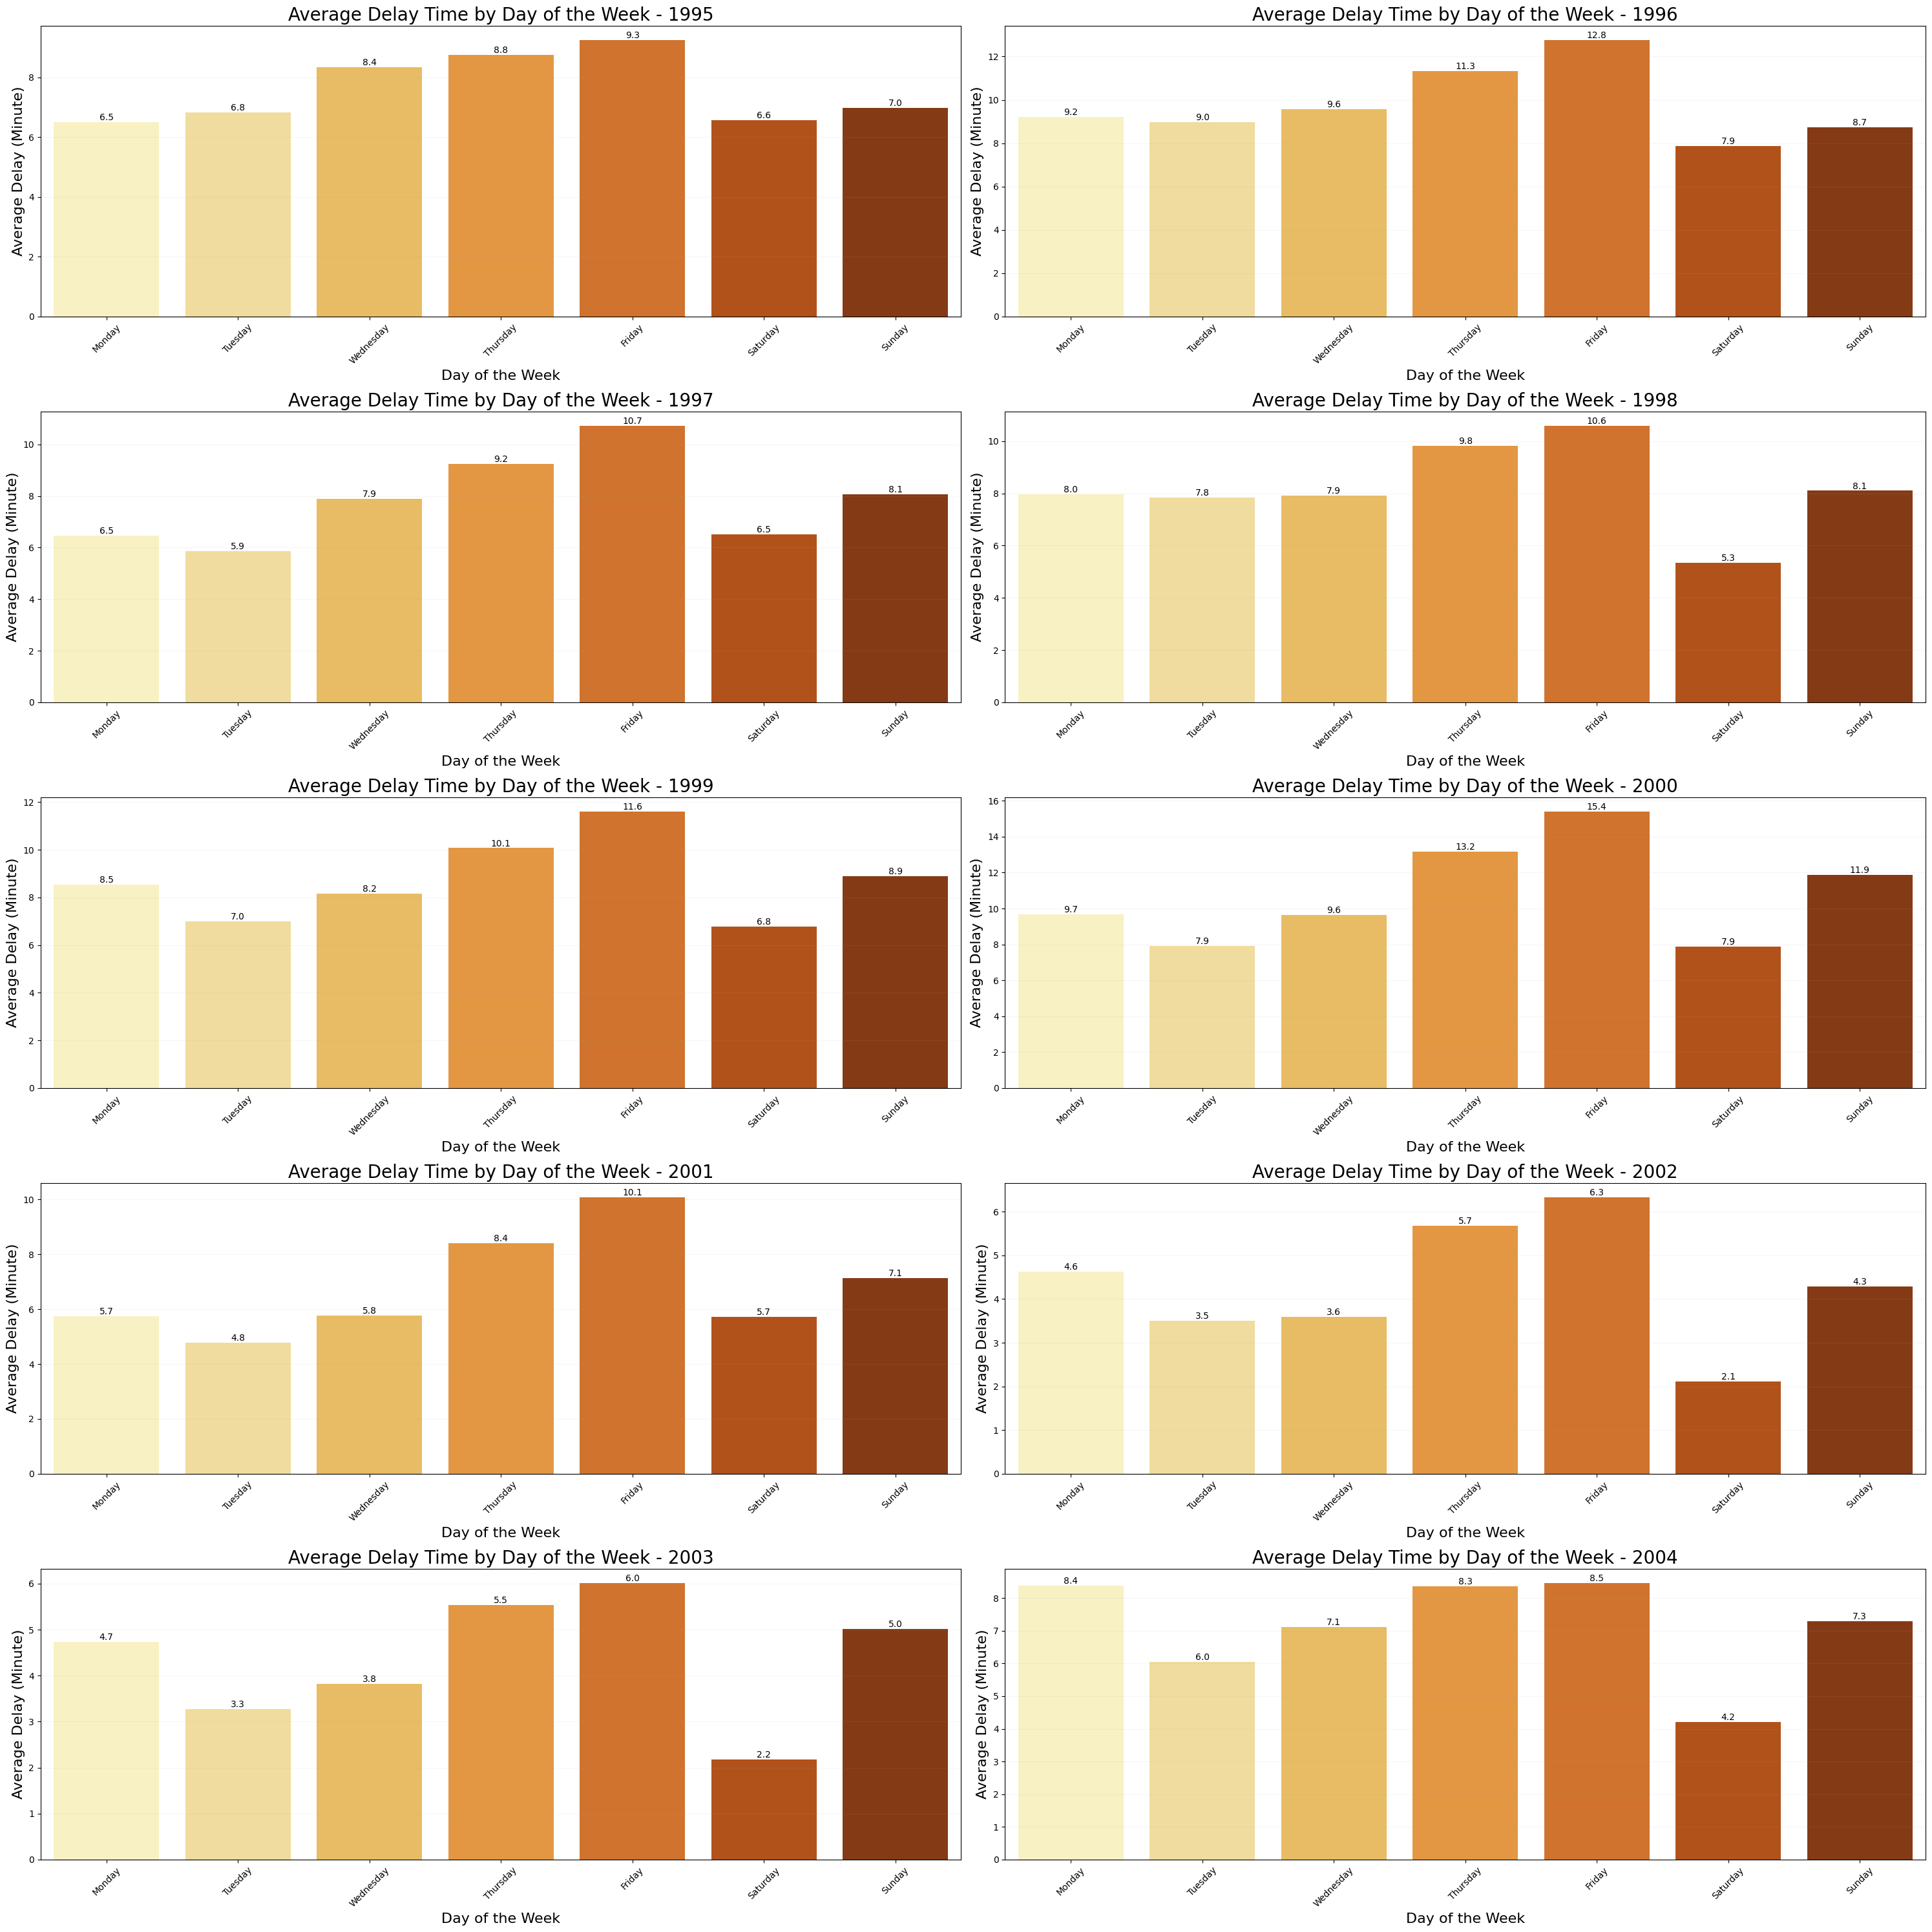

In [12]:
#Best day per year
num_rows = 5
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

for idx, year in enumerate(years):
    df_year = df_day[df_day['Year'] == year]
    df_avg_day = df_year.groupby('DayOfWeek', as_index=False)['AvgDelayTime'].mean()
    df_avg_day['DayOfWeek'] = df_avg_day['DayOfWeek'].apply(lambda x: calendar.day_name[x-1])

    row_idx = idx // num_cols
    col_idx = idx % num_cols

    ax = sns.barplot(data=df_avg_day, x='DayOfWeek', y='AvgDelayTime', palette='YlOrBr', ax=axes[row_idx, col_idx])
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')
    ax.set_title(f'Average Delay Time by Day of the Week - {year}', fontsize=20)
    ax.set_xlabel('Day of the Week', fontsize=16)
    ax.set_ylabel('Average Delay (Minute)', fontsize=16)
    ax.grid(True, axis='y', alpha=0.1)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [16]:
overall_best_days = []
for year in years:
    df_year = df_day[df_day['Year'] == year]
    df_avg_day_year = df_year.groupby('DayOfWeek', as_index=False)['AvgDelayTime'].mean()
    best_day_year = df_avg_day_year[df_avg_day_year['AvgDelayTime'] == df_avg_day_year['AvgDelayTime'].min()]
    overall_best_days.append(best_day_year)

best_days_table = pd.concat(overall_best_days, ignore_index=True)
best_days_table['Years'] = years  
best_days_table['DayOfWeek'] = best_days_table['DayOfWeek'].apply(lambda x: calendar.day_name[x - 1])

best_days_table = best_days_table[['Years', 'DayOfWeek', 'AvgDelayTime']]
best_days_table.columns = ['Year', 'Day of the Week', 'Average Delay']

print(best_days_table.to_string(index=False))


 Year Day of the Week  Average Delay
 1995          Monday       6.512384
 1996        Saturday       7.859997
 1997         Tuesday       5.868216
 1998        Saturday       5.349508
 1999        Saturday       6.780820
 2000        Saturday       7.883807
 2001         Tuesday       4.779724
 2002        Saturday       2.107944
 2003        Saturday       2.171316
 2004        Saturday       4.215136
